In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_info_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn 
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [2]:
#import the dataset
in1=pd.read_csv('y_df_utf-8.csv',delimiter='\t')

## Dataset:
3 years (1/1/2015-12/31/2017) of enterprise OneSource service data<br>
**Predictors:** created by summarizing data before prediction point: 10/2/2017<br>
**Target:** did the component fail (need a repair) between 10/2/2017 and 12/31/2017 (90 day window)

In [3]:
#make sure target isn't missing
in1.dropna(subset=['TARGET'],inplace=True)

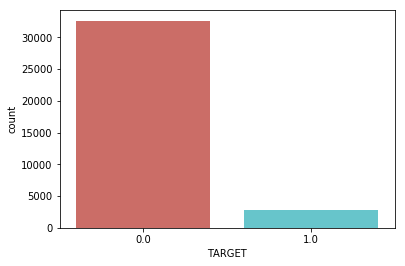

In [4]:
#look at target distribution
sns.countplot(x='TARGET',data=in1, palette='hls')

#### Separate predictors and target

In [5]:
#the target
y="TARGET"

In [11]:
#list all our columns to copy and paste into the next step
list(in1.columns)

['ASSET_DESCRIPTION',
 'ONESOURCE_TAG',
 'SYSTEM_ID_SYSTEM_ID',
 'DEPARTMENT_DEPARTMENT',
 'CUSTOMER_NAME_CUSTOMER_NAME',
 'SITE_NAME_SITE_NAME',
 'OFFICE_REGION_OFFICE_REGION',
 'OFFICE_COUNTRY_OFFICE_COUNTRY',
 'BUILDING_BUILDING',
 'ROOM_ROOM',
 'GxP_FLAG_GxP_FLAG',
 'ASSET_DESCRIPTION_ASSET_DESCRIPTION',
 'AMGEN_COST_CAT_AMGEN_COST_CAT',
 'MANUFACTURER_MANUFACTURER',
 'MODEL_MODEL',
 'LEVEL-1_SERVICE_TRIAGE_LEVEL-1_SERVICE_TRIAGE',
 'LEVEL-2_SERVICE_TRIAGE_DS_LEVEL-2_SERVICE_TRIAGE_DS',
 'COVERAGE_COVERAGE',
 'ENTITLEMENT_EVENTS_ENTITLEMENT_EVENTS',
 'EQUIPMENT_ID_EQUIPMENT_ID',
 'SERIAL_SERIAL',
 'YOM_YOM',
 'CALL_RECEIVED_DATE_max',
 'CALL_RECEIVED_DATE_min',
 'SERVICE_ORDER_ID_SERVICE_ORDER_ID',
 'BILLABLE_BILLABLE',
 'ACTUAL_DOWNTIME_mean',
 'ACTUAL_DOWNTIME_std',
 'ACTUAL_DOWNTIME_sum',
 'MAINTENANCE_TIME_mean',
 'MAINTENANCE_TIME_std',
 'MAINTENANCE_TIME_sum',
 'DOWNTIME_HOURS_mean',
 'DOWNTIME_HOURS_std',
 'DOWNTIME_HOURS_sum',
 'RESPONSE_TIME_mean',
 'RESPONSE_TIME_std',
 '

In [7]:
#comment out the columns we don't want to use as predictors
x=[
 'ASSET_DESCRIPTION',
#  'ONESOURCE_TAG',#unique component identifier
#  'SYSTEM_ID_SYSTEM_ID',#unique system identifier
 'DEPARTMENT_DEPARTMENT',
 'CUSTOMER_NAME_CUSTOMER_NAME',
 'SITE_NAME_SITE_NAME',
 'OFFICE_REGION_OFFICE_REGION',
 'OFFICE_COUNTRY_OFFICE_COUNTRY',
 'BUILDING_BUILDING',
 'ROOM_ROOM',
 'GxP_FLAG_GxP_FLAG',#is the lab GxP regulated?
#  'ASSET_DESCRIPTION_ASSET_DESCRIPTION',#duplicate column
#  'AMGEN_COST_CAT_AMGEN_COST_CAT', #specific to only 1 client
 'MANUFACTURER_MANUFACTURER',
 'MODEL_MODEL',
 'LEVEL-1_SERVICE_TRIAGE_LEVEL-1_SERVICE_TRIAGE',#level 1 contract category
 'LEVEL-2_SERVICE_TRIAGE_DS_LEVEL-2_SERVICE_TRIAGE_DS',#level 2 contract category
 'COVERAGE_COVERAGE',
 'ENTITLEMENT_EVENTS_ENTITLEMENT_EVENTS',
#  'EQUIPMENT_ID_EQUIPMENT_ID',#unique identifier of component
#  'SERIAL_SERIAL', #serial number
 'YOM_YOM',#year of manufacturer
#  'CALL_RECEIVED_DATE_max',#min date a call was received
#  'CALL_RECEIVED_DATE_min',#max data a call was received
 'SERVICE_ORDER_ID_SERVICE_ORDER_ID',#count of services
 'BILLABLE_BILLABLE',#count of billable services (not covered under contract entitlements)
 'ACTUAL_DOWNTIME_mean',
 'ACTUAL_DOWNTIME_std',
 'ACTUAL_DOWNTIME_sum',
 'MAINTENANCE_TIME_mean',
 'MAINTENANCE_TIME_std',
 'MAINTENANCE_TIME_sum',
 'DOWNTIME_HOURS_mean',
 'DOWNTIME_HOURS_std',
 'DOWNTIME_HOURS_sum',
 'RESPONSE_TIME_mean',
 'RESPONSE_TIME_std',
 'RESPONSE_TIME_sum',
 'LINE_ITEM_CNTR_VALUE_mean',#mean value of contract on the component
 'LINE_ITEM_CNTR_VALUE_std',
 'LINE_ITEM_CNTR_VALUE_sum',
 'VAL_INVOICES_RAISED_USD_mean',#mean value of invoices raised by client that are not included in conract
 'VAL_INVOICES_RAISED_USD_std',
 'VAL_INVOICES_RAISED_USD_sum',
 'sum_parts_mean',#mean number of parts used in the service call
 'sum_parts_std',
 'sum_parts_sum',
 'u_parts_mean',#mean unique parts used in the service call
 'u_parts_std',
 'u_parts_sum',
 'part_cost_mean',#mean part cost used in the service call
 'part_cost_std',
 'part_cost_sum',
 'engn_tier',#mode of the engineer tier of the CSE working on the call
 'repairs',#total repairs
 'timeframe',#number of days for which we have data on this component
 'repairs_per_year'#historical number of repairs per year
#     ,
#  'TARGET'    #target variable
]

## These are the data we can use
with x as the list of predictors and y as the target

In [8]:
print(x)
print(y)

['ASSET_DESCRIPTION', 'DEPARTMENT_DEPARTMENT', 'CUSTOMER_NAME_CUSTOMER_NAME', 'SITE_NAME_SITE_NAME', 'OFFICE_REGION_OFFICE_REGION', 'OFFICE_COUNTRY_OFFICE_COUNTRY', 'BUILDING_BUILDING', 'ROOM_ROOM', 'GxP_FLAG_GxP_FLAG', 'MANUFACTURER_MANUFACTURER', 'MODEL_MODEL', 'LEVEL-1_SERVICE_TRIAGE_LEVEL-1_SERVICE_TRIAGE', 'LEVEL-2_SERVICE_TRIAGE_DS_LEVEL-2_SERVICE_TRIAGE_DS', 'COVERAGE_COVERAGE', 'ENTITLEMENT_EVENTS_ENTITLEMENT_EVENTS', 'YOM_YOM', 'SERVICE_ORDER_ID_SERVICE_ORDER_ID', 'BILLABLE_BILLABLE', 'ACTUAL_DOWNTIME_mean', 'ACTUAL_DOWNTIME_std', 'ACTUAL_DOWNTIME_sum', 'MAINTENANCE_TIME_mean', 'MAINTENANCE_TIME_std', 'MAINTENANCE_TIME_sum', 'DOWNTIME_HOURS_mean', 'DOWNTIME_HOURS_std', 'DOWNTIME_HOURS_sum', 'RESPONSE_TIME_mean', 'RESPONSE_TIME_std', 'RESPONSE_TIME_sum', 'LINE_ITEM_CNTR_VALUE_mean', 'LINE_ITEM_CNTR_VALUE_std', 'LINE_ITEM_CNTR_VALUE_sum', 'VAL_INVOICES_RAISED_USD_mean', 'VAL_INVOICES_RAISED_USD_std', 'VAL_INVOICES_RAISED_USD_sum', 'sum_parts_mean', 'sum_parts_std', 'sum_parts_su

### To get arrays, like we used in one of our examples

In [9]:
X=in1.loc[:,x]
X.shape

(35354, 49)

In [10]:
Y=in1.loc[:,y]
Y.shape

(35354,)

---

## Simple Logistic Regression

## Logistic Regression with Regularization

## Logistic Regression with PCA (principal component analysis)

# Bonus
## Logistic Regression with LDA (linear discriminant analysis)